In [1]:
# smote, code smzna, bilstm, 
# glove on cnn+bilstm, 

In [2]:
# changes=> 70 30 split
# model mdhe changes
# smote applied

In [52]:
import pandas as pd

In [53]:
df=pd.read_csv('./merged1.csv')
df.shape

(49972, 4)

In [54]:
df.head()

,Headline,Body ID,articleBody,label
0,Hundreds of Palestinians flee floods in Gaza a...,158,Hundreds of Palestinians were evacuated from t...,1
1,'Nasa Confirms Earth Will Experience 6 Days of...,154,Thousands of people have been duped by a fake ...,1
2,Banksy 'Arrested & Real Identity Revealed' Is ...,1739,If you’ve seen a story floating around on your...,1
3,Gateway Pundit,2327,A British rapper whose father is awaiting tria...,1
4,Woman detained in Lebanon is not al-Baghdadi's...,1468,An Iraqi official denied that a woman detained...,1


In [57]:
df.sample(5)

,Headline,Body ID,articleBody,label
9280,Nigeria says ceasefire agreed with Boko Haram,600,Abuja (AFP) - Nigeria on Friday claimed to hav...,1
27515,Israeli Canadian fighting ISIS posts on Facebo...,1808,We're just two months away from the Apple Watc...,0
19643,"IS Beheads Briton David Cawthorne Haines, Thre...",1011,WARNING: GRAPHIC IMAGES. A masked militant cla...,0
12569,American hostage in Yemen freed in military ra...,1844,"SANA, Yemen — An American journalist held for ...",1
36274,Turkish Leader Says U.S. Airdrop Aided ISIS Mi...,305,This video is the epitome of a close shave.\n\...,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49972 entries, 0 to 49971
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headline     49972 non-null  object
 1   Body ID      49972 non-null  int64 
 2   articleBody  49972 non-null  object
 3   label        49972 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.5+ MB


In [59]:
df.isnull().sum()

Headline       0
Body ID        0
articleBody    0
label          0
dtype: int64

In [60]:
df.describe()

,Body ID,label
count,49972.000000,49972.000000
mean,1366.254863,0.251881
std,730.086644,0.434098
min,0.000000,0.000000
25%,737.750000,0.000000
50%,1419.000000,0.000000
75%,2002.000000,1.000000
max,2532.000000,1.000000


In [61]:
df.duplicated().sum()

402

In [62]:
duplicated_rows = df[df.duplicated()]
print(duplicated_rows)


                                                Headline  Body ID  \
693    #HairGate: iPhone 6 Customers Are Complaining ...     2476   
1104   MPs credit sergeant-at-arms for saving lives i...     1900   
1826   Seven girls fall pregnant after five day schoo...     2508   
2046   YPG Confirms: Gill Rosenberg Not Captured in K...     1106   
2299   McDonald’s Removing Big Mac, Apple Pies And El...     1026   
...                                                  ...      ...   
49568  Nun gives birth to surprise baby after complai...     1164   
49593  WHO says reports of suspected Ebola cases in I...       93   
49640  MPs credit sergeant-at-arms for saving lives i...     1002   
49818  ISIS Leader Killed: Abu Bakr Al-Baghdadi Repor...      511   
49865  Government fires employee who skipped work for...      686   

                                             articleBody  label  
693    Apple is continuing to experience "Hairgate" p...      1  
1104   He’s being called a hero for sho

In [63]:
df = df.drop_duplicates()


In [64]:
df.shape

(49570, 4)

In [65]:
df.sample(5)

,Headline,Body ID,articleBody,label
48484,Isis militants claim to have killed US journal...,2453,A short video clip has been circulating online...,0
7086,"Islamic State, in video titled ""A Message to A...",2096,Islamic State militants have released a graphi...,1
17588,Priest' claim of seeing God as a woman dismiss...,398,(CNN) -- Could a newly released audio provide ...,0
29125,The Internet Tried To Make Axl Rose Its Latest...,533,The heroic sergeant-at-arms who shot dead a lo...,0
26773,Canadian-Israeli Woman Says She Hasn’t Been Ca...,387,"(Nov. 26, 2014) – Your Thanksgiving turkey is ...",0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49570 entries, 0 to 49971
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headline     49570 non-null  object
 1   Body ID      49570 non-null  int64 
 2   articleBody  49570 non-null  object
 3   label        49570 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.9+ MB


In [16]:
df.describe()

,Body ID,label
count,49570.000000,49570.000000
mean,1366.436696,0.251705
std,730.053227,0.433997
min,0.000000,0.000000
25%,740.000000,0.000000
50%,1419.500000,0.000000
75%,2002.000000,1.000000
max,2532.000000,1.000000


In [66]:
df.duplicated().sum()

0

In [67]:
import seaborn as sns

In [68]:
df['label'].value_counts()

label
0    37093
1    12477
Name: count, dtype: int64

In [69]:
df.head()

,Headline,Body ID,articleBody,label
0,Hundreds of Palestinians flee floods in Gaza a...,158,Hundreds of Palestinians were evacuated from t...,1
1,'Nasa Confirms Earth Will Experience 6 Days of...,154,Thousands of people have been duped by a fake ...,1
2,Banksy 'Arrested & Real Identity Revealed' Is ...,1739,If you’ve seen a story floating around on your...,1
3,Gateway Pundit,2327,A British rapper whose father is awaiting tria...,1
4,Woman detained in Lebanon is not al-Baghdadi's...,1468,An Iraqi official denied that a woman detained...,1


In [70]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.10.0


In [71]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [72]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import gensim

In [73]:
# # Concatenate the datasets
# data = pd.concat([true_news, fake_news], ignore_index=True)
# print(data.info())
# data=pd.read_csv('./merged1.csv')
data=df
print(data.info())
data


<class 'pandas.core.frame.DataFrame'>
Index: 49570 entries, 0 to 49971
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headline     49570 non-null  object
 1   Body ID      49570 non-null  int64 
 2   articleBody  49570 non-null  object
 3   label        49570 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.9+ MB
None


,Headline,Body ID,articleBody,label
0,Hundreds of Palestinians flee floods in Gaza a...,158,Hundreds of Palestinians were evacuated from t...,1
1,'Nasa Confirms Earth Will Experience 6 Days of...,154,Thousands of people have been duped by a fake ...,1
2,Banksy 'Arrested & Real Identity Revealed' Is ...,1739,If you’ve seen a story floating around on your...,1
3,Gateway Pundit,2327,A British rapper whose father is awaiting tria...,1
4,Woman detained in Lebanon is not al-Baghdadi's...,1468,An Iraqi official denied that a woman detained...,1
...,...,...,...,...
49967,Indian 'Rapist' Castrated By Angry Mob Who Hac...,1760,"Money makes the world go round, right?\n\nLunc...",0
49968,Canadian Soldier Shot At Ottawa War Memorial: ...,524,Apple would never lower itself to rubbing elbo...,0
49969,Urgent: The Leader of ISIL 'Abu Bakr al-Baghda...,1681,(CNN) -- Boko Haram laughed off Nigeria's anno...,0
49970,Brian Williams slams social media for speculat...,2419,Along with unveiling the Apple Watch earlier t...,0


In [74]:
df['label'].value_counts()

label
0    37093
1    12477
Name: count, dtype: int64

In [75]:
corpus = np.r_[data['Headline'].values,data['articleBody'].values]
print(49972*2)
print(len(corpus)) # first 49972 contains the Headline and next 49972 contains the articleBody

vocabulary = []
for sentence in corpus:
    vocabulary.extend(sentence.split(' '))

vocabulary = list(set(vocabulary))
vocab_length = len(vocabulary)
print("Vocabulary Length is {0}".format(vocab_length))

99944
99140
Vocabulary Length is 64509


In [76]:
max_features = 5000
MAX_NB_WORDS = 24000
EMBEDDING_DIM = 50
MAX_SEQUENCE_LENGTH = 64


In [77]:
import os

In [78]:
GLOVE_DIR = "./glove.6B.50d.txt"
def setup_embedding_index():
    embedding_index=dict()
    f = open(os.path.join(GLOVE_DIR,"glove.6B.50d.txt"),encoding='utf-8')
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.array(values[1:],dtype='float32')
        embedding_index[word] = coefs
    f.close()
    return embedding_index
embeddings_index = setup_embedding_index()

In [79]:
tokenizer_headline = Tokenizer(num_words=max_features, split=' ')
tokenizer_headline.fit_on_texts(data.loc[:,'Headline'].values)
vocab_headline_length = len(tokenizer_headline.word_index)+1

encoded_docs_headline = tokenizer_headline.texts_to_sequences(data.loc[:,'Headline'])
padded_docs_headline = pad_sequences(encoded_docs_headline, maxlen=16, padding='post')

print(vocab_headline_length)
word_index_headline = tokenizer_headline.word_index

NUM_WORDS_HEADLINE = vocab_headline_length

3880


In [80]:
tokenizer_body = Tokenizer(num_words=max_features, split=' ')
tokenizer_body.fit_on_texts(data.loc[:,'articleBody'].values)
vocab_body_length = len(tokenizer_body.word_index)+1

encoded_docs_body = tokenizer_body.texts_to_sequences(data.loc[:,'articleBody'])
padded_docs_body = pad_sequences(encoded_docs_body, maxlen=48, padding='post')

print(vocab_body_length)
word_index_body = tokenizer_body.word_index

NUM_WORDS_BODY = vocab_body_length
print(NUM_WORDS_BODY)


27428
27428


In [82]:
embedding_matrix_headline = np.zeros((NUM_WORDS_HEADLINE, EMBEDDING_DIM))

for word, i in tokenizer_headline.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix_headline[i] = embedding_vector
dims = len(embedding_matrix_headline[0])

print(dims)


50


In [32]:
embedding_matrix_body = np.zeros((NUM_WORDS_BODY, EMBEDDING_DIM))

for word, i in tokenizer_body.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix_body[i] = embedding_vector
dims = len(embedding_matrix_body[0])

print(dims)


50


In [83]:
print(padded_docs_headline.shape)
print(padded_docs_body.shape)


(49570, 16)
(49570, 48)


In [84]:
df['label'].value_counts()

label
0    37093
1    12477
Name: count, dtype: int64

In [85]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical,plot_model

from tensorflow.keras import Input,Model,Sequential
from tensorflow.keras.layers import LSTM,Embedding,Dropout,Activation,Reshape,Dense,GRU,Add,Flatten,concatenate,Bidirectional

from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.utils import to_categorical,plot_model
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint


In [35]:
# input_headline = Input(shape=16,name='input_headline')
# embedding_layer_headline = Embedding(input_dim = vocab_headline_length,output_dim = 50,
#                                      weights=[embedding_matrix_headline],
#                                      input_length = 16,trainable=True)(input_headline)

# # lstm_headline = LSTM(units=16)(embedding_layer_headline)

# input_body = Input(shape=48,name='input_body')
# embedding_layer_body = Embedding(input_dim = vocab_body_length,output_dim = 50,weights = [embedding_matrix_body],
#                                  input_length=48,trainable = True)(input_body)
# lstm_body = LSTM(units=48)(embedding_layer_body)

# addition_layer = concatenate([embedding_layer_headline,embedding_layer_body],axis=1)

# # addition_layer = concatenate([lstm_headline,lstm_body],axis=1)
# lstm = LSTM(units=64,)(addition_layer)
# drop = Dropout(0.25)(lstm)
# # dense = Dense(64,activation='relu')(drop)
# # flatten = Flatten()(addition_layer)

# output = Dense(2,activation='sigmoid')(drop)

# model = Model(inputs=[input_headline,input_body],outputs=output)
# # from keras.optimizers import SGD
# # sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)

# # model.compile(loss = "categorical_crossentropy", optimizer = sgd,metrics = ['accuracy'])

# model.compile(optimizer = 'adam',loss ='categorical_crossentropy',metrics = ['accuracy'])


In [86]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout, Dense, concatenate

# Input Layer for Headline
input_headline = Input(shape=16, name='input_headline')
embedding_layer_headline = Embedding(input_dim=vocab_headline_length, 
                                     output_dim=50, 
                                     weights=[embedding_matrix_headline], 
                                     input_length=16, 
                                     trainable=True)(input_headline)

# CNN Layer for Headline (extracts local features)
cnn_headline = Conv1D(filters=128, kernel_size=5, activation='relu')(embedding_layer_headline)
cnn_headline = MaxPooling1D(pool_size=2)(cnn_headline)

# BiLSTM Layer for Headline
bilstm_headline = Bidirectional(LSTM(units=64, return_sequences=False))(cnn_headline)
drop_headline = Dropout(0.25)(bilstm_headline)

# Input Layer for Body
input_body = Input(shape=48, name='input_body')
embedding_layer_body = Embedding(input_dim=vocab_body_length, 
                                 output_dim=50, 
                                 weights=[embedding_matrix_body], 
                                 input_length=48, 
                                 trainable=True)(input_body)

# CNN Layer for Body (extracts local features)
cnn_body = Conv1D(filters=128, kernel_size=5, activation='relu')(embedding_layer_body)
cnn_body = MaxPooling1D(pool_size=2)(cnn_body)

# BiLSTM Layer for Body
bilstm_body = Bidirectional(LSTM(units=64, return_sequences=False))(cnn_body)
drop_body = Dropout(0.25)(bilstm_body)

# Concatenate Headline and Body features
addition_layer = concatenate([drop_headline, drop_body], axis=1)

# Fully connected layer after concatenation
dense = Dense(64, activation='relu')(addition_layer)

# Output Layer
output = Dense(2, activation='sigmoid')(dense)

# Define the model
model = Model(inputs=[input_headline, input_body], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_headline (InputLayer)    [(None, 16)]         0           []                               
                                                                                                  
 input_body (InputLayer)        [(None, 48)]         0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 16, 50)       194000      ['input_headline[0][0]']         
                                                                                                  
 embedding_3 (Embedding)        (None, 48, 50)       1371400     ['input_body[0][0]']             
                                                                                            

In [37]:
# model.summary()


In [38]:
%pip install pydot
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


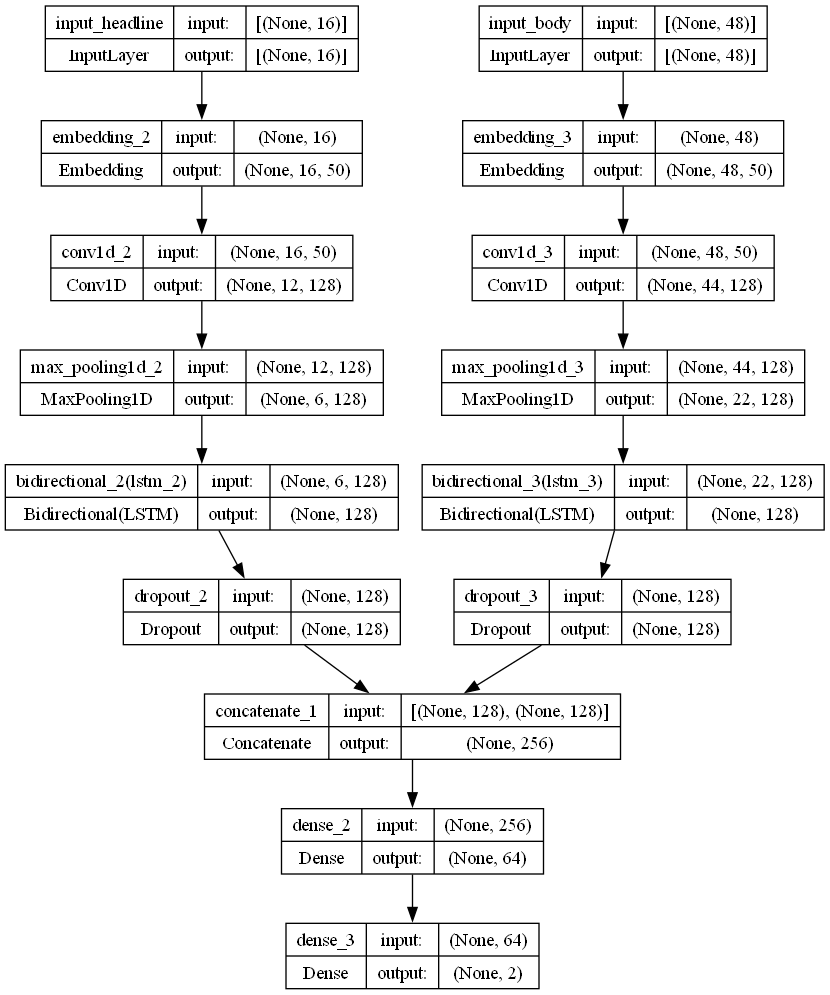

In [87]:
plot_model(model, to_file='model_glove_lstm.png', show_shapes=True, show_layer_names=True)

In [93]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE

# Separate features and labels
X_headline = padded_docs_headline
X_body = padded_docs_body
y = data['label'].values

# Perform a stratified train-test split to ensure both classes are in each set
X_headline_train, X_headline_test, X_body_train, X_body_test, y_train, y_test = train_test_split(
    X_headline, X_body, y, test_size=0.3, stratify=y, random_state=42
)

# Check class distribution in y_train and y_test to confirm balance
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))

# Apply SMOTE only to the training labels
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_combined = np.hstack([X_headline_train, X_body_train])
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_combined, y_train)

# Reshape SMOTE data back into separate headline and body parts
X_headline_train_resampled = X_train_resampled[:, :X_headline_train.shape[1]]
X_body_train_resampled = X_train_resampled[:, X_headline_train.shape[1]:]

# Convert labels to categorical format for training and testing sets
y_train_resampled = to_categorical(y_train_resampled)
y_test = to_categorical(y_test)

# Verify the setup
print("Unique values in y_test after stratified split:", np.unique(np.argmax(y_test, axis=1)))
print("Unique values in y_train_resampled after SMOTE:", np.unique(np.argmax(y_train_resampled, axis=1)))


Unique values in y_train: [0 1]
Unique values in y_test: [0 1]
Unique values in y_test after stratified split: [0 1]
Unique values in y_train_resampled after SMOTE: [0 1]


In [94]:
# MODELS_DIR = os.path.join("/home/abhinav/fake_news_challenge/model/glove_lstm")
filepath = os.path.join(os.getcwd(),"{epoch:02d}-{val_accuracy:.2f}.hdf5")
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [95]:
# # Concatenate headline and body data for SMOTE application
# X_train = np.concatenate([padded_docs_headline_train, padded_docs_body_train], axis=1)  # Combine headline and body features
# y_train = np.argmax(labels_train, axis=1)  # Convert one-hot encoded labels to integers

# # Apply SMOTE
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Convert the resampled labels back to one-hot encoding
# y_train_resampled = to_categorical(y_train_resampled, num_classes=2)

# # Split the resampled data back into headline and body features
# padded_docs_headline_train_resampled = X_train_resampled[:, :16]  # First 16 columns for headline
# padded_docs_body_train_resampled = X_train_resampled[:, 16:]  # The remaining columns for body

# Continue with your model training using the resampled data
# Make sure padded_docs_headline_train_smote, padded_docs_body_train_smote, and labels_train_smote
# are defined and correctly processed as shown in the previous response

model_history = model.fit(
    [X_headline_train_resampled, X_body_train_resampled],  # Using SMOTE-resampled headline and body inputs
    y_train_resampled,  # Using the SMOTE-resampled labels
    epochs=40,
    shuffle=True,
    verbose=1,
    validation_data=([X_headline_test, X_body_test], y_test),  # Using original test set
    callbacks=[checkpoint]
)


Epoch 1/40
1623/1623 [==============================] - ETA: 0s - loss: 0.0916 - accuracy: 0.9670
Epoch 1: val_accuracy improved from -inf to 0.95797, saving model to e:\Project\FND_new\startover\01-0.96.hdf5
1623/1623 [==============================] - 41s 25ms/step - loss: 0.0916 - accuracy: 0.9670 - val_loss: 0.1000 - val_accuracy: 0.9580
Epoch 2/40
1623/1623 [==============================] - ETA: 0s - loss: 0.0624 - accuracy: 0.9754
Epoch 2: val_accuracy improved from 0.95797 to 0.96705, saving model to e:\Project\FND_new\startover\02-0.97.hdf5
1623/1623 [==============================] - 40s 25ms/step - loss: 0.0624 - accuracy: 0.9754 - val_loss: 0.0808 - val_accuracy: 0.9670
Epoch 3/40
1622/1623 [============================>.] - ETA: 0s - loss: 0.0562 - accuracy: 0.9778
Epoch 3: val_accuracy improved from 0.96705 to 0.98030, saving model to e:\Project\FND_new\startover\03-0.98.hdf5
1623/1623 [==============================] - 60s 37ms/step - loss: 0.0562 - accuracy: 0.9778 - va

In [96]:
# Check the class distribution in the resampled training data
unique, counts = np.unique(np.argmax(y_train_resampled, axis=1), return_counts=True)
class_distribution = dict(zip(unique, counts))

print("Class distribution on train data after SMOTE:")
print(class_distribution)

# Check the class distribution in the test labels
unique_test, counts_test = np.unique(np.argmax(y_test, axis=1), return_counts=True)
class_distribution_test = dict(zip(unique_test, counts_test))

print("Class distribution in test data:")
print(class_distribution_test)


Class distribution on train data after SMOTE:
{0: 25965, 1: 25965}
Class distribution in test data:
{0: 11128, 1: 3743}


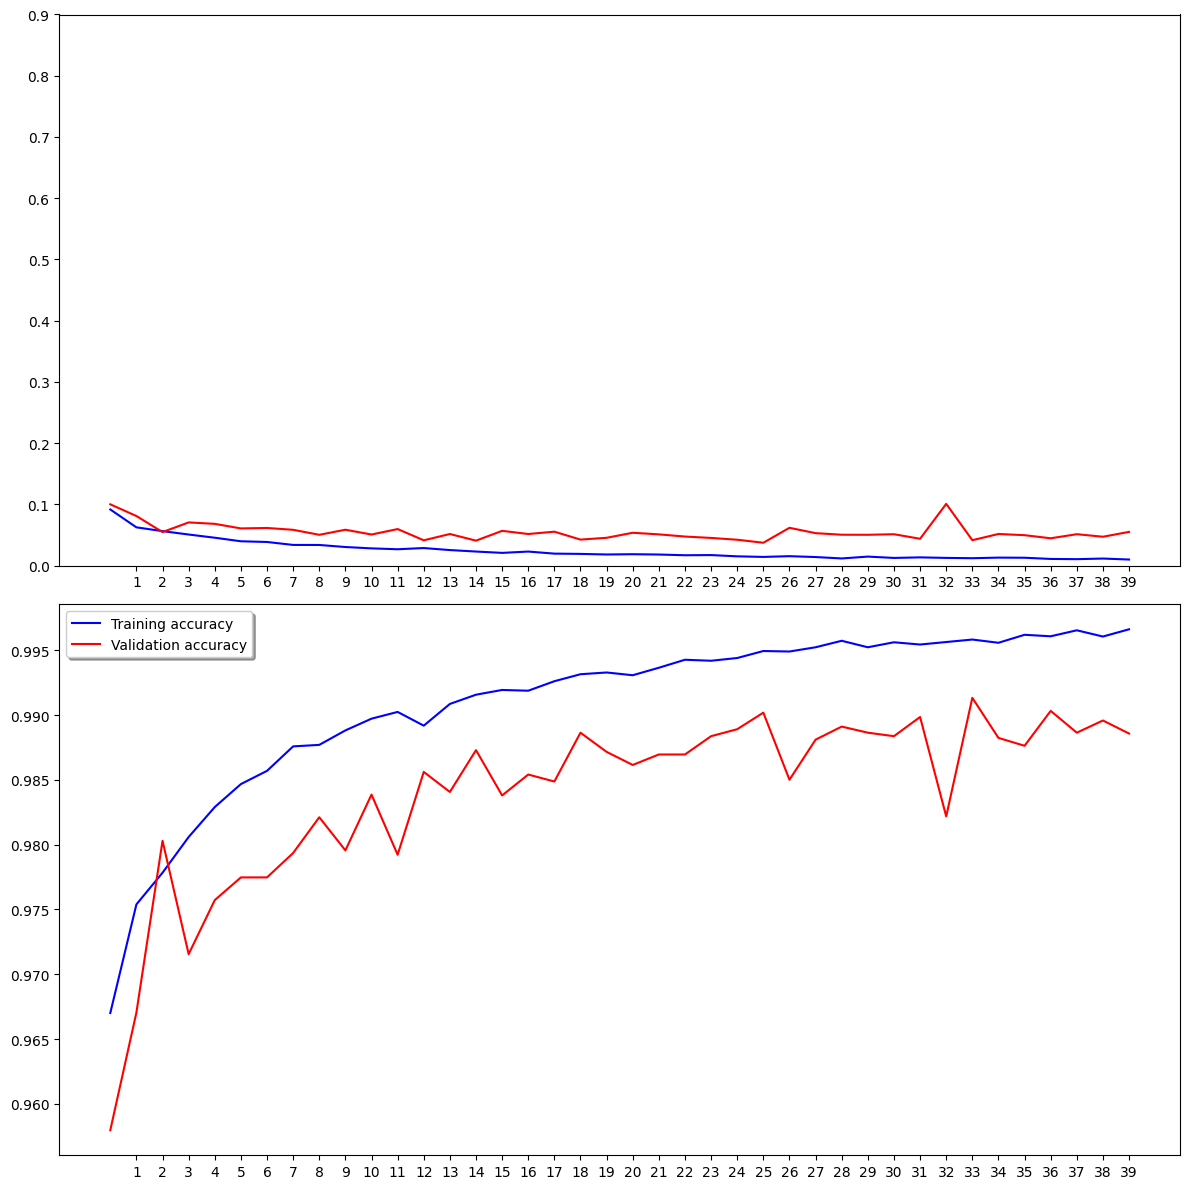

In [97]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(model_history.history['loss'], color='b', label="Training loss")
ax1.plot(model_history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 40, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(model_history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(model_history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 40, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [98]:
from sklearn.metrics import classification_report


# Evaluate on the test set
test_loss, test_accuracy = model.evaluate([X_headline_test, X_body_test], y_test, verbose=0)

# Print test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict the test labels
predictions = model.predict([X_headline_test, X_body_test])

# Convert predictions to the class labels (as categorical values)
predictions = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Print classification report
print("\nClassification Report:\n")
print(classification_report(true_labels, predictions))


Test Accuracy: 96.36%
465/465 [==============================] - 3s 5ms/step

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11128
           1       0.91      0.95      0.93      3743

    accuracy                           0.96     14871
   macro avg       0.95      0.96      0.95     14871
weighted avg       0.96      0.96      0.96     14871



In [ ]:
# # Load the best model (Uncomment if you want to load it)
# # best_model = tf.keras.models.load_model('best_model.h5')

# # Evaluate the model
# loss, accuracy = model.evaluate([padded_docs_headline_test, padded_docs_body_test], labels_test, verbose=0)
# print(f"Test Loss: {loss}")
# print(f"Test Accuracy: {accuracy}")

# # Predict on the test set
# # Use the loaded model for prediction if you uncommented best_model above
# # predictions = (best_model.predict([padded_docs_headline_test, padded_docs_body_test]) > 0.5).astype("int32")
# predictions = model.predict([padded_docs_headline_test, padded_docs_body_test])

# # Convert predictions to class labels
# predictions = np.argmax(predictions, axis=1)
# true_labels = np.argmax(labels_test, axis=1)

# # Confusion Matrix
# from sklearn.metrics import confusion_matrix, classification_report

# cm = confusion_matrix(true_labels, predictions)
# print("Confusion Matrix:")
# print(cm)

# # Classification Report
# cr = classification_report(true_labels, predictions)
# print("Classification Report:")
# print(cr)


Test Loss: 0.21829760074615479
Test Accuracy: 0.9629480242729187
465/465 [==============================] - 5s 10ms/step
Confusion Matrix:
[[14320   551]
 [    0     0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     14871
           1       0.00      0.00      0.00         0

    accuracy                           0.96     14871
   macro avg       0.50      0.48      0.49     14871
weighted avg       1.00      0.96      0.98     14871



e:\Project\FND_new\myenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Project\FND_new\myenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Project\FND_new\myenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
